In [3]:
#dependencies 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense 
import seaborn as sns



In [4]:
#read data 
seed = 9 
df = pd.read_csv('../Week-1/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#Eliminate unnecessary features

da = df.drop(['id'],axis=1)
conv_dates = [1 if values == 2014 else 0 for values in da.date] #date is converted into 0s and 1s
da['date'] = conv_dates
da['bathrooms'] = da['bathrooms'].astype(int)
da['floors'] = da['floors'].astype(int)
da.head()
da.shape

(21613, 20)

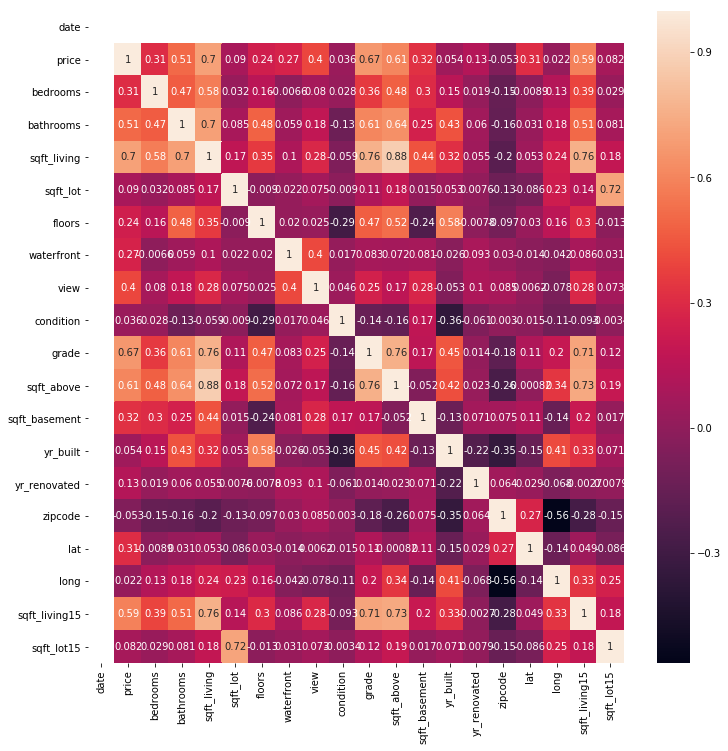

In [6]:
#Draw a Correlation map: 


# Sets the size of the figure
fig, ax = plt.subplots(figsize = (12, 12))

# Creates a heat map, annot = True displays values
sns.heatmap(da.corr(), annot=True)

In [15]:
#split features from label and remove unnecessary features 
cols = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view','sqft_basement','bedrooms','lat']
x = da[cols]
y = da['price']


In [27]:
def Baseline_model():
    model = Sequential()
    model.add(Dense(9, input_shape=(9,) , kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

In [29]:
model = Baseline_model()

model.fit(x,y, validation_data=(x,y), epochs = 30, batch_size = 1000, verbose=2 )

Train on 21613 samples, validate on 21613 samples
Epoch 1/30
 - 0s - loss: 426464815771.0001 - mean_squared_error: 426464815771.0001 - val_loss: 426452130890.5270 - val_mean_squared_error: 426452130890.5270
Epoch 2/30
 - 0s - loss: 426439336812.6990 - mean_squared_error: 426439336812.6990 - val_loss: 426421290937.0264 - val_mean_squared_error: 426421290937.0264
Epoch 3/30
 - 0s - loss: 426396110703.7786 - mean_squared_error: 426396110703.7786 - val_loss: 426360317205.9720 - val_mean_squared_error: 426360317205.9720
Epoch 4/30
 - 0s - loss: 426315444597.9142 - mean_squared_error: 426315444597.9142 - val_loss: 426255987600.8965 - val_mean_squared_error: 426255987600.8965
Epoch 5/30
 - 0s - loss: 426189530150.4243 - mean_squared_error: 426189530150.4243 - val_loss: 426105966642.6006 - val_mean_squared_error: 426105966642.6006
Epoch 6/30
 - 0s - loss: 426018055630.9391 - mean_squared_error: 426018055630.9391 - val_loss: 425910635662.1841 - val_mean_squared_error: 425910635662.1841
Epoch 7/

In [30]:
scores = model.evaluate(x,y)
print("%s: %d" % (model.metrics_names[1], scores[1]))

21613/21613 [==============================] - 1s 27us/step
mean_squared_error: 409125571179
